In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = pd.read_csv('results_table.csv')
display(model.head())
display(model.tail())
print(model.shape)

,map_layout_code,max_cars,max_bikes,count_cars,throughput
0,1,1,0,106,106.0
1,1,1,0,107,107.0
2,1,1,0,104,104.0
3,1,1,0,106,106.0
4,1,1,0,106,106.0


,map_layout_code,max_cars,max_bikes,count_cars,throughput
2263,3,13,3,340,26.153846
2264,3,13,6,282,21.692308
2265,3,13,9,91,7.000000
2266,3,13,12,182,14.000000
2267,3,13,15,158,12.153846


(2268, 5)


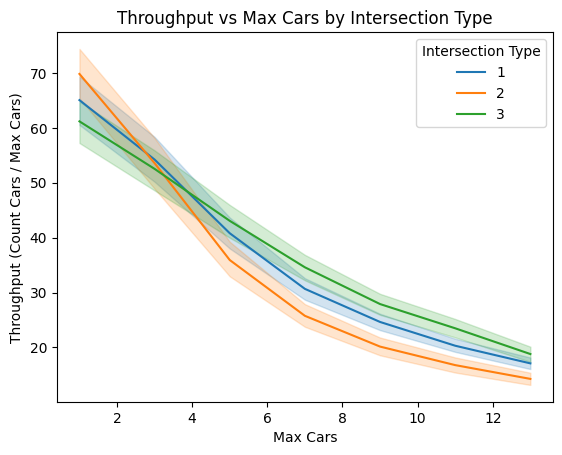

In [8]:
sns.lineplot(
    data=model,
    x="max_cars",
    y="throughput",
    hue="map_layout_code",
    estimator="mean",
    palette="tab10"
)
plt.title("Throughput vs Max Cars by Intersection Type")
plt.xlabel("Max Cars")
plt.ylabel("Throughput (Count Cars / Max Cars)")
plt.legend(title="Intersection Type")
plt.show()

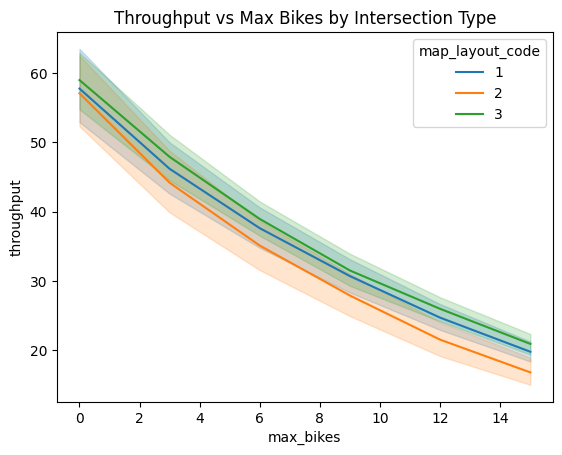

In [9]:
sns.lineplot(
    data=model,
    x="max_bikes",
    y="throughput",
    hue="map_layout_code",
    estimator="mean",
    palette="tab10"
)
plt.title("Throughput vs Max Bikes by Intersection Type")
plt.show()


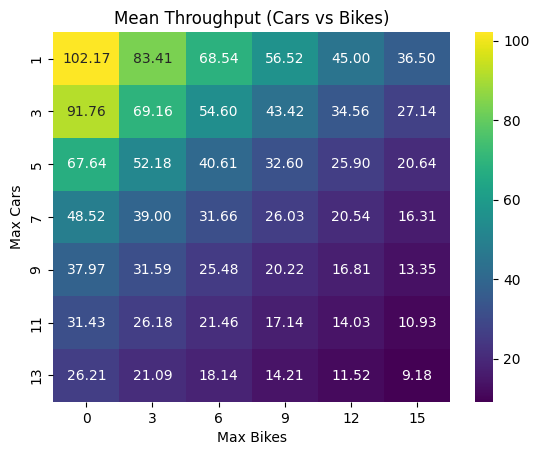

In [10]:
pivot = model.pivot_table(
    index="max_cars",
    columns="max_bikes",
    values="throughput",
    aggfunc="mean"
)

sns.heatmap(pivot, cmap="viridis", annot=True, fmt=".2f")
plt.title("Mean Throughput (Cars vs Bikes)")
plt.xlabel("Max Bikes")
plt.ylabel("Max Cars")
plt.show()

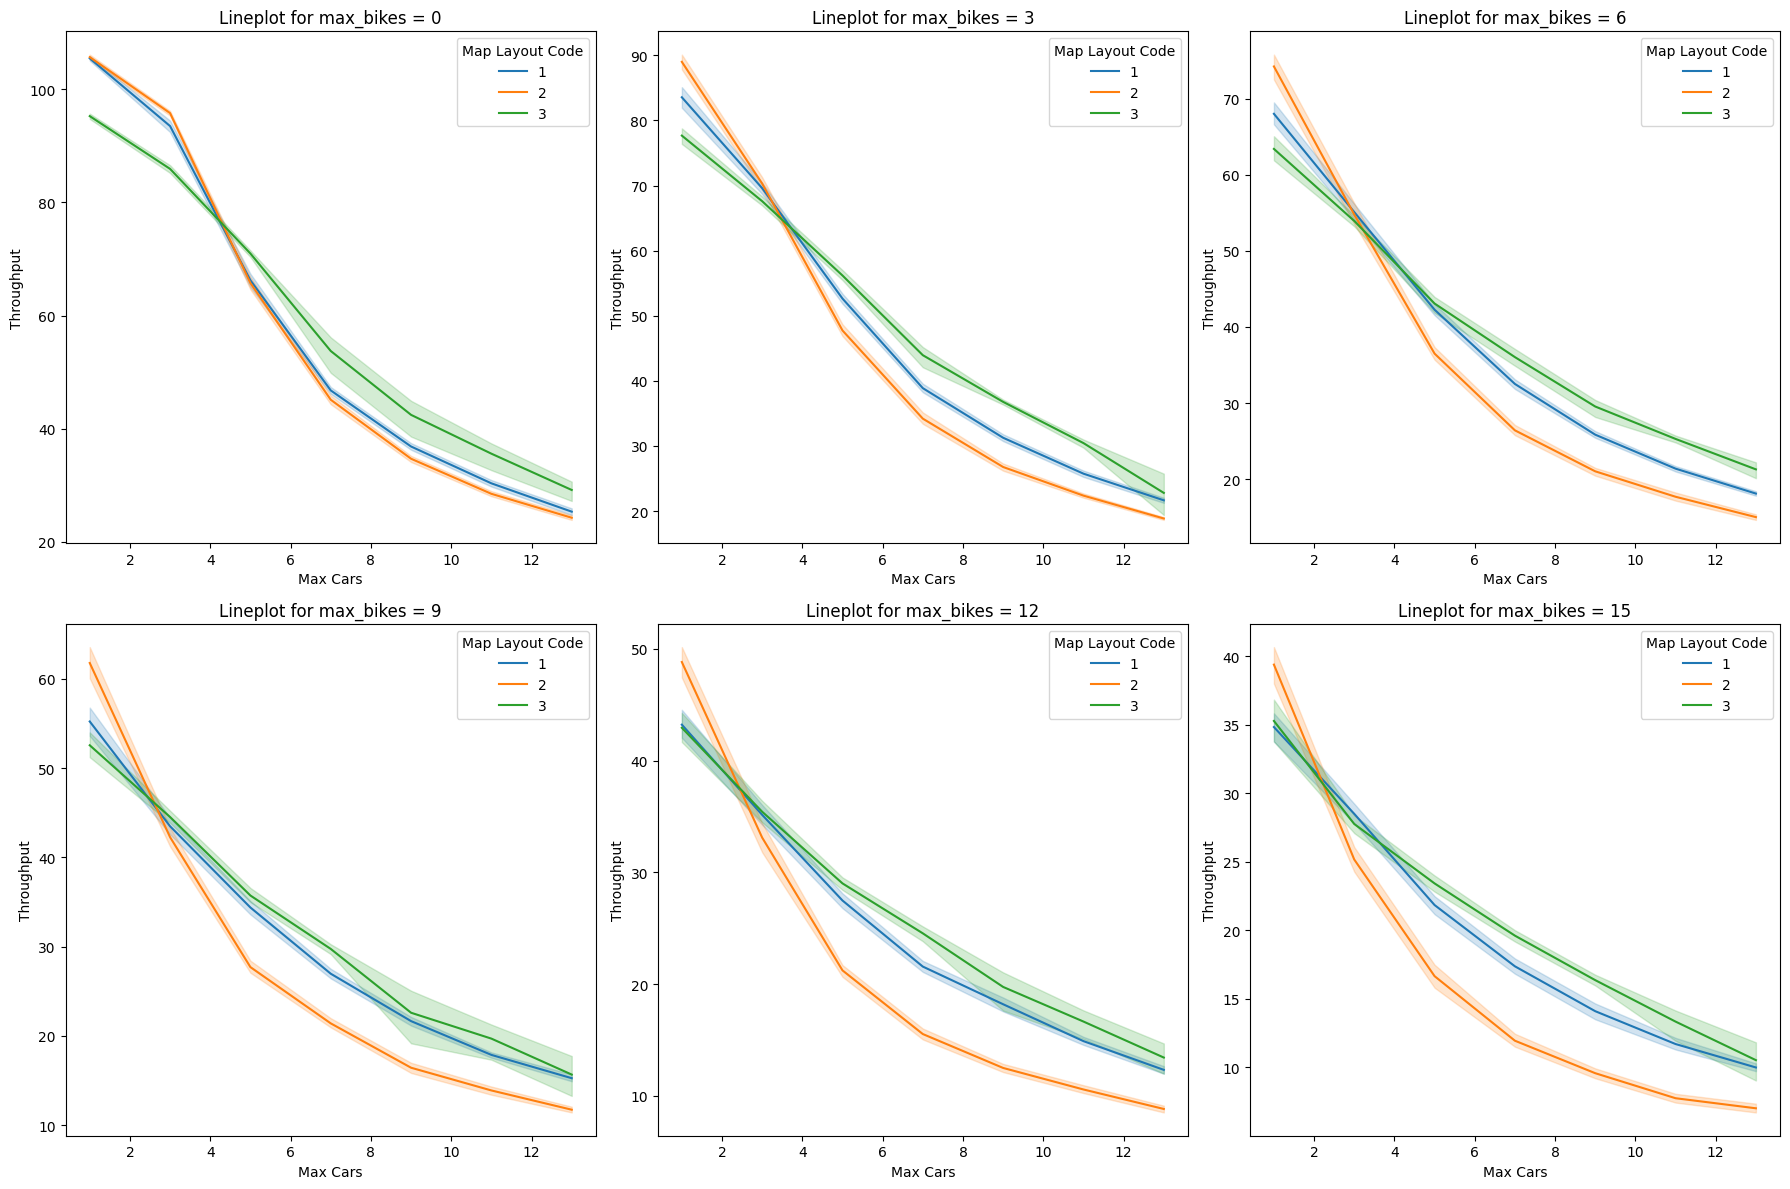

In [5]:
unique_max_bikes = model['max_bikes'].unique()

fig, axes = plt.subplots(2,3, figsize=(18,12))  # Create a 3x2 grid of subplots

for ax, max_bike in zip(axes.flatten(), unique_max_bikes):
    subset = model[model['max_bikes'] == max_bike]
    sns.lineplot(data=subset, x='max_cars', y='throughput', hue='map_layout_code', ax=ax, palette='tab10')
    ax.set_title(f'Lineplot for max_bikes = {max_bike}')
    ax.set_xlabel('Max Cars')
    ax.set_ylabel('Throughput')
    ax.legend(title='Map Layout Code')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Welke intersection kan je het beste aanleggen bij een verwacht aantal autos

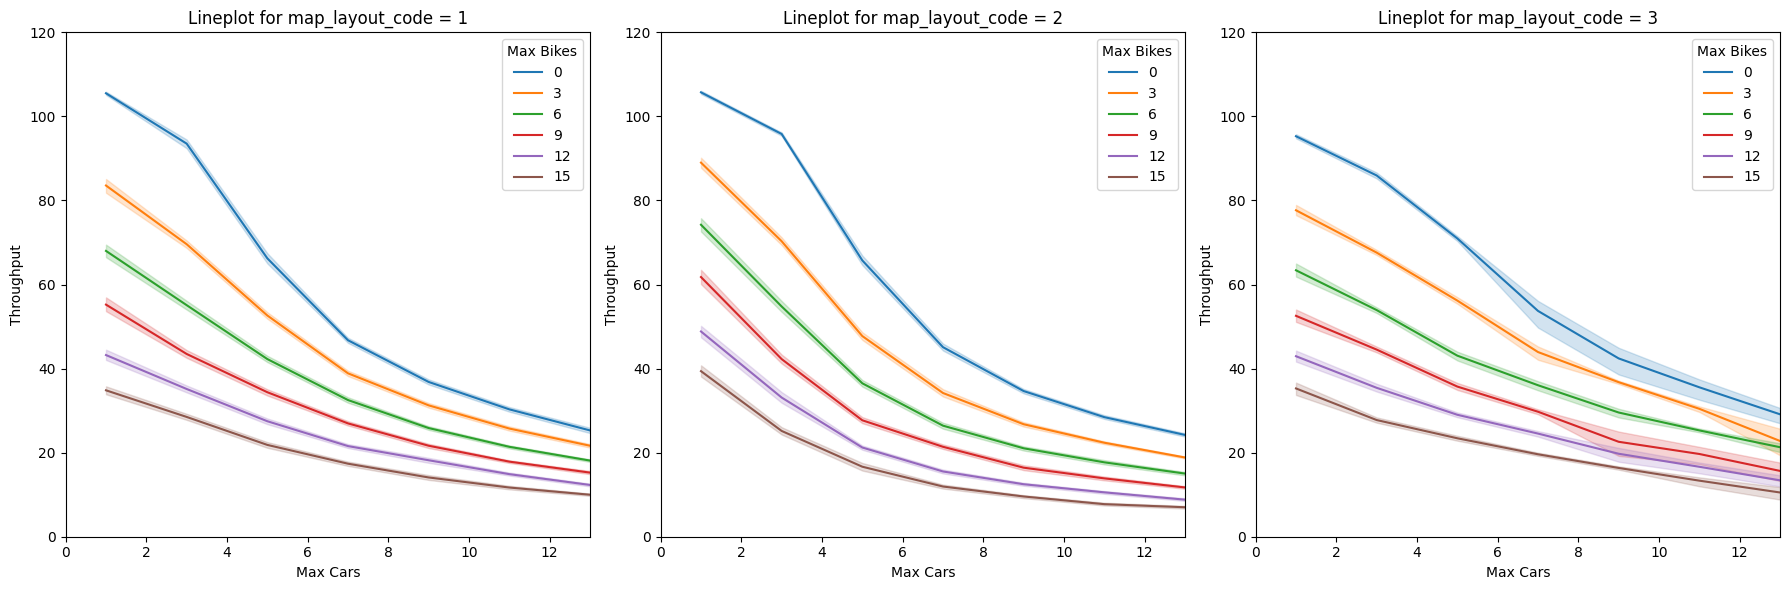

In [6]:
unique_layouts = model['map_layout_code'].unique()

fig, axes = plt.subplots(1,3, figsize=(18,6))  # Create a 3x2 grid of subplots

for ax, layout in zip(axes.flatten(), unique_layouts):
    subset = model[model['map_layout_code'] == layout]
    sns.lineplot(data=subset, x='max_cars', y='throughput', hue='max_bikes', ax=ax, palette='tab10')
    ax.set_title(f'Lineplot for map_layout_code = {layout}')
    ax.set_xlabel('Max Cars')
    ax.set_ylabel('Throughput')
    ax.legend(title='Max Bikes')
    ax.set_ylim(0, 120)
    ax.set_xlim(0, 13)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()